# 作業 : (Kaggle)鐵達尼生存預測
https://www.kaggle.com/c/titanic

# [作業目標]
- 試著調整特徵篩選的門檻值, 觀察會有什麼影響效果

# [作業重點]
- 調整相關係數過濾法的篩選門檻, 看看篩選結果的影響 (In[5]~In[8], Out[5]~Out[8])
- 調整L1 嵌入法篩選門檻, 看看篩選結果的影響 (In[9]~In[11], Out[9]~Out[11])

In [56]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

data_path = 'data/'
df = pd.read_csv(data_path + 'titanic_train.csv')

train_Y = df['Survived']
df = df.drop(['PassengerId'] , axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


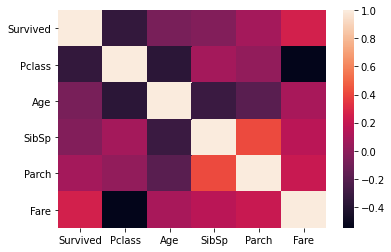

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


In [61]:
# 計算df整體相關係數, 並繪製成熱圖
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
sns.heatmap(corr)
plt.show()
print(corr)

In [58]:
# 記得刪除 Survived
df1 = df.drop(['Survived'] , axis=1)

#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df1.dtypes, df1.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

# 削減文字型欄位, 只剩數值型欄位
df1 = df1[num_features]
df1 = df1.fillna(-1)
MMEncoder = MinMaxScaler()
df1.head()

5 Numeric Features : ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']



,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


# 作業1
* 鐵達尼生存率預測中，試著變更兩種以上的相關係數門檻值，觀察預測能力是否提升?

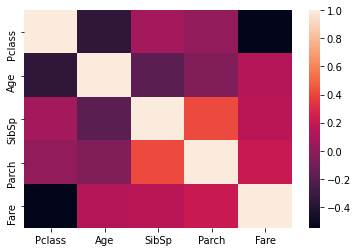

In [59]:
## 剩下5個特徵之後的heatmap
sns.heatmap(df1.corr())
plt.show()

In [60]:
## 相關係數
corr1 = df1.corr()
corr1

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.359728,0.083081,0.018443,-0.549500
Age,-0.359728,1.000000,-0.182282,-0.045272,0.135707
SibSp,0.083081,-0.182282,1.000000,0.414838,0.159651
Parch,0.018443,-0.045272,0.414838,1.000000,0.216225
Fare,-0.549500,0.135707,0.159651,0.216225,1.000000


In [74]:
train_X

array([[1.        , 0.28395062, 0.125     , 0.        , 0.01415106],
       [0.        , 0.48148148, 0.125     , 0.        , 0.13913574],
       [1.        , 0.33333333, 0.        , 0.        , 0.01546857],
       ...,
       [1.        , 0.        , 0.125     , 0.33333333, 0.04577135],
       [0.        , 0.33333333, 0.        , 0.        , 0.0585561 ],
       [1.        , 0.40740741, 0.        , 0.        , 0.01512699]])

In [72]:
# 原始特徵 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df1)
estimator = LogisticRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.70041428661101

In [70]:
# 篩選相關係數1
high_list = list(corr[(corr['Survived']>0.1) | (corr['Survived']<-0.1)].index)
print(high_list)
high_list.pop(0)
print(high_list)

['Survived', 'Pclass', 'Fare']
['Pclass', 'Fare']


In [71]:
# 特徵1 + 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df1[high_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6790973573535873

In [75]:
# 篩選相關係數2
"""
Your Code Here
"""
high_list = list(corr[(corr['Survived']>0.5) | (corr['Survived']<-0.1)].index)
print(high_list)
high_list.pop(0)
print(high_list)

['Survived', 'Pclass']
['Pclass']


In [76]:
# 特徵2 ()+ 邏輯斯迴歸
train_X = MMEncoder.fit_transform(df[high_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.6790973573535873

# 作業2
* 續上題，使用 L1 Embedding 做特徵選擇(自訂門檻)，觀察預測能力是否提升?

In [78]:
from sklearn.linear_model import Lasso
"""
Your Code Here, select parameter alpha 
"""
L1_Reg = Lasso(alpha=0.001) ## Lasso 為 Linear Regression 加上 L1
train_X = MMEncoder.fit_transform(df1)
L1_Reg.fit(train_X, train_Y)
L1_Reg.coef_

array([-0.39684291, -0.25338753, -0.19144856,  0.28161304,  0.28188094])

In [79]:
from itertools import compress
L1_mask = list((L1_Reg.coef_>0) | (L1_Reg.coef_<0))
L1_list = list(compress(list(df1), list(L1_mask)))
L1_list

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [80]:
# L1_Embedding 特徵 + 線性迴歸
train_X = MMEncoder.fit_transform(df1[L1_list])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.70041428661101